# Guide to Network Analysis (Part 1)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Network-Dataset" data-toc-modified-id="Network-Dataset-2">Network Dataset</a></span><ul class="toc-item"><li><span><a href="#What-is-a-Network-Dataset?" data-toc-modified-id="What-is-a-Network-Dataset?-2.1">What is a Network Dataset?</a></span></li><li><span><a href="#Multimodal-Network-Dataset" data-toc-modified-id="Multimodal-Network-Dataset-2.2">Multimodal Network Dataset</a></span></li></ul></li><li><span><a href="#Network-Analysis-Layer" data-toc-modified-id="Network-Analysis-Layer-3">Network Analysis Layer</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3.1">Data Preparation</a></span></li><li><span><a href="#Publish-a-Network-Analysis-Layer" data-toc-modified-id="Publish-a-Network-Analysis-Layer-3.2">Publish a Network Analysis Layer</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Create-a-GIS-instance" data-toc-modified-id="Step-1:-Create-a-GIS-instance-3.2.1">Step 1: Create a GIS instance</a></span></li><li><span><a href="#Step-2:-Access-the-federated-servers" data-toc-modified-id="Step-2:-Access-the-federated-servers-3.2.2">Step 2: Access the federated servers</a></span></li><li><span><a href="#Step-3:-Publish-an-SD-to-server" data-toc-modified-id="Step-3:-Publish-an-SD-to-server-3.2.3">Step 3: Publish an SD to server</a></span></li></ul></li><li><span><a href="#Create-a-Routing-Layer" data-toc-modified-id="Create-a-Routing-Layer-3.3">Create a Routing Layer</a></span><ul class="toc-item"><li><span><a href="#The-default-routing-service-of-your-enterprise" data-toc-modified-id="The-default-routing-service-of-your-enterprise-3.3.1">The default routing service of your enterprise</a></span></li><li><span><a href="#Customized-routing-service" data-toc-modified-id="Customized-routing-service-3.3.2">Customized routing service</a></span></li></ul></li><li><span><a href="#Simple-Application:-Route-between-two-stops" data-toc-modified-id="Simple-Application:-Route-between-two-stops-3.4">Simple Application: Route between two stops</a></span></li><li><span><a href="#What's-next?" data-toc-modified-id="What's-next?-3.5">What's next?</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

## Introduction

Network Analysis, in Python API for ArcGIS, is designed to help users answer questions like the following <a href="#References">[1]</a>:

 - What is the quickest way to get from Manhattan to Brooklyn?
 - If a fire incident is reported in downtown San Fransisco, what are the closest fire stations that can respond to the incident within five minutes' drive time?
 - What are the market areas covered by the warehouses in various cities?
 - What is the nearest coffee shop from my current location?
 - How can we route our fleet of delivery vehicles to minimize overall transportation costs and improve customer service?
 - Where should we open a new branch of our business to maximize market share?
 - Our company needs to downsize—which stores should we close to maintain the most overall demand?
 - What are live or historical traffic conditions like, and how do they affect my network analysis results?
 
These questions, asked by businesses, public services, or organizations, are related to running their operations more efficiently, and improving their strategic decision making. For instance, organizations can better understand dynamic markets, both current and potential, once they know who can access their goods or services. Transportation costs can be reduced by optimally sequencing stops and finding the shortest paths between the stops while considering several constraints such as time windows, vehicle capacities, and maximum travel times. Customer service can be improved through quicker response times or more convenient facility locations.

Fig 1 (as shown below) summarizes the most commonly used applications in network analysis.

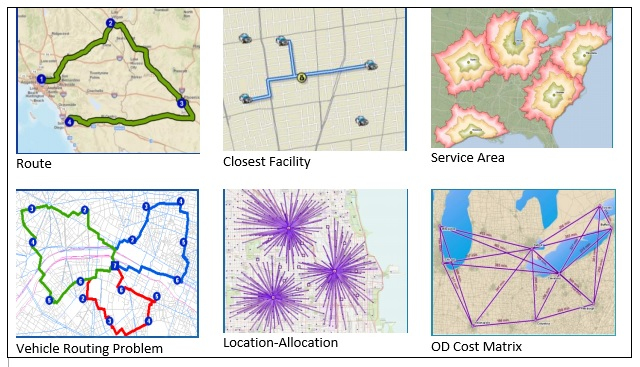
<text align="left">Fig 1. Applications of Network Analysis (source: <a href="#References">[2]</a>)</text>

This guide is to walk you through the commonly used Network Analysis tools, and how the above mentioned concerns or questions can be solved by ArcGIS Python API, in the following order:
 - Network Dataset and Network Analysis Layer (You are here!) 
 - Find Routes (<a href="guide_to_network_analysis_part2.ipynb">Part 2</a>)
 - Generate Service Area (<a href="guide_to_network_analysis_part3.ipynb">Part 3</a>)
 - Find Closest Facility (<a href="guide_to_network_analysis_part4.ipynb">Part 4</a>)
 - Generate Origin Destination Cost Matrix (Part 5)
 - Solve Location Allocation (Part 6)
 - Vehicle Routing Problem Service (Part 7)
 - 3D Network Analysis Workflow (Part 8)
 
Please refer to the road map above if you want to jump to the next topic. Otherwise, if you choose to stay with us, in part 1, you will get to know `network dataset`, `network analysis layer`, and how to create `RouteServiceLayer` etc. in need to solve a network analysis problem. 

In the rest of the guide, <a href="guide_to_network_analysis_part2.ipynb">Part 2</a> introduces finding the quickest, shortest, or even the most scenic route, depending on the impedance you choose to solve for; <a href="guide_to_network_analysis_part3.ipynb">Part 3</a> guides you in finding service areas (a.k.a. a region that encompasses all accessible streets (that is, streets that are within a specified impedance) around any location on a network; <a href="guide_to_network_analysis_part4.ipynb">Part 4</a> walks you through steps in measuring the cost of traveling between incidents and facilities and determining which are nearest to one another; Part 5 talks about how to find and measure the least-cost paths along the network from multiple origins to multiple destinations; Part 6 demonstrates processes in deciding the optimized allocation of new locations for facilities. More advanced topics such as Vehicle Routing problem, of which the goal is to best service the orders and minimize the overall operating cost for the fleet of vehicles, and 3D network analysis workflow (which includes 3D routing inside a building) will be covered in Part 7 and Part 8.


If you are new to Network Analysis or in need of a refresher of the concepts, the Youtube video below would serve as a good introduction to the key ideas:

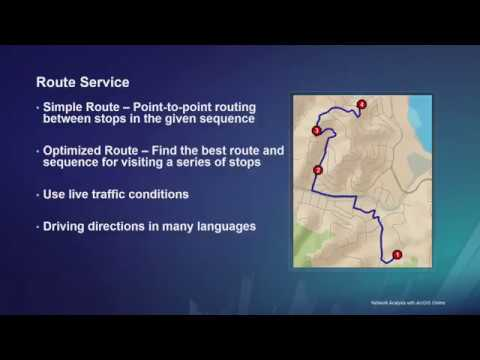

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cakVXmuB0ag')

## Network Dataset

### What is a Network Dataset?

In order to model transportation networks, Network Dataset are created from source features, which can include simple features (lines and points) and turns, and store the connectivity of the source features. When you perform a network analysis, it is always done on a network dataset <a href="#References">[3]</a>.

Also, Network Dataset contain Network elements. Network elements are generated from the source features used to create the network dataset. The geometry of the source features helps establish connectivity. In addition, network elements have attributes that control navigation over the network <a href="#References">[4]</a>.

The following are the three types of network elements:

 - **Edges**—Edges connect to other elements (junctions) and are the links over which agents travel. Line feature classes participate as edge feature sources.
 - **Junctions**—Junctions connect edges and facilitate navigation from one edge to another. Point feature classes can participate as junction feature sources, but multipoint feature classes cannot.
 - **Turns**—Turns store information that can affect movement between two or more edges. Turn feature classes participate as turn feature sources in a network. A turn feature source models a subset of possible transitions between edge elements during navigation.
 
Edges and junctions form the basic structure of a network. Connectivity in a network deals with connecting edges and junctions to each other. Turns are optional elements that store information about a particular turning movement; for instance, a left turn is restricted from one particular edge to another.

### Multimodal Network Dataset

Multimodal Network Dataset are used for transportation situations when the set of [origin, destination] remain the same, but performed with two or more different modes of transport. For example, constructing a transportation network in downtown Paris in roads, railways, and buses would lead to multimodal network dataset <a href="#References">[3]</a>.

## Network Analysis Layer

The `Network Analysis Layer` is the base Layer type to perform analysis on network datasets. The network analysis layers can be created using a local network dataset or with logistic services hosted in ArcGIS Online or Portal for ArcGIS. If you perform an analysis using ArcGIS Online, the solver references a high-quality, worldwide network dataset stored in the ArcGIS Online cloud and will use ArcGIS Online credits. If you're using your own data, no online credits are used <a href="#References">[5]</a>.

Inherited from `Network Analysis Layer`, the `Route Analysis Layer`, `Service Area Analysis Layer`, `Closest Facility Analysis Layer`, etc., are created to tailor the needs of defining and solving the problems of Routing, Generating Service Area, or finding the closest facilities (see in Fig 2 for the structures).

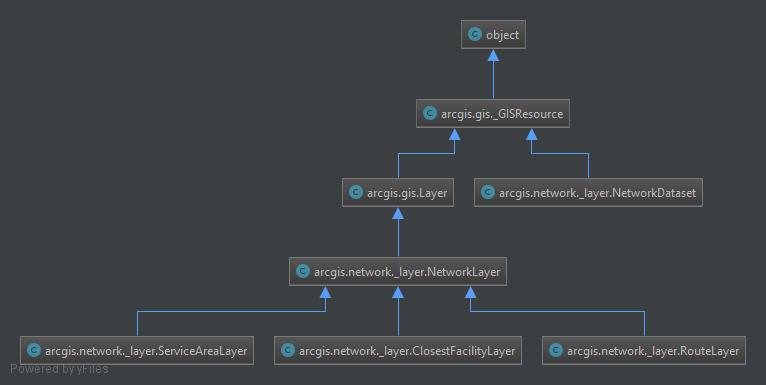

<text align="central">Fig 2. Structure of the NetworkLayer Class.</text>

### Data Preparation

If you are interested in trying out the following workflows on your own, please go to ArcGIS online and download the <a href="https://www.arcgis.com/home/item.html?id=d6bd91b2fddc483b8ccbc66942db84cb">ArcGIS Network Analyst Tutorial Data</a> onto your local machine. Unzip the file and open up the Exercise03.mxd to start the publishing workflow.

### Publish a Network Analysis Layer

#### Step 1: Create a GIS instance

In [2]:
from arcgis.gis import GIS
import os
import arcgis.network as network
import arcgis.geocoding as geocoding
import pandas as pd

In [3]:
username = "portaladmin"
password = "esri.agp"
gis = GIS("https://datascienceqa.esri.com/portal", username, password)

#### Step 2: Access the federated servers

In [4]:
gis_servers = gis.admin.servers.list()
gis_servers

[<NotebookServer @ https://dev0006138.esri.com/turing/admin>,
 <Server at https://datascienceqa.esri.com/server/admin>,
 <Server at https://dev0008498.esri.com/server/admin>]

In [5]:
server1 = gis_servers[1]
type(server1)

arcgis.gis.server.admin.administration.Server

In [6]:
gis.admin.servers.validate()

True

In [7]:
hosted_services = server1.services.list(folder='System')

#print the top 5 as a sample
hosted_services[5:9]

[<Service at https://datascienceqa.esri.com/server/admin/services/System/FeatureServiceToolsEx.GPServer>,
 <Service at https://datascienceqa.esri.com/server/admin/services/System/GeoAnalyticsManagement.GPServer>,
 <Service at https://datascienceqa.esri.com/server/admin/services/System/GeoAnalyticsTools.GPServer>,
 <Service at https://datascienceqa.esri.com/server/admin/services/System/LocationReferencingSystemTools.GPServer>]

#### Step 3: Publish an SD to server

Note that the service definition (.sd) file used here is created with Network Analysis (NA) extension enabled, and the operation `Route` selected. Hence, when the map service is successfully published onto server, the REST endpoint for NAServer and Route will also be open, e.g. at `<esriNAServerRouteLayer>/NAServer` and `<esriNAServerRouteLayer>/NAServer/Route`.

In [9]:
server1.services.publish_sd(sd_file=r"\\redarchive2\ags_desktop\byuser\forchunmingp\ipynb\na_layer_route.sd",
                            folder=None)

True

<Item title:"na_layer_route" type:Network Analysis Layer owner:portaladmin>
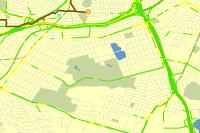

In [13]:
published_item = gis.content.search('na_layer_route', item_type = 'Network Analysis Service')[0]
published_item

In [14]:
published_item.url

'https://datascienceqa.esri.com/server/rest/services/na_layer_route/NAServer'

### Create a Routing Layer

To create a NetworkLayer object which you would use later for network analysis, you would need to provide the URL to the network analysis service. However, since all ArcGIS Online organizations already have access to those routing services, you can access this URL through the GIS object. If you have your own ArcGIS Server based map service with network analysis capability enabled, you would need to provide the REST end point URL for this service.

#### The default routing service of your enterprise

First, there is a default route service associated with your gis object:

In [15]:
default_route_service_url = gis.properties.helperServices.route.url
default_route_service_url

'https://datascienceqa.esri.com/portal/sharing/servers/a6b1da5409004c7c9ff823026f6bef50/rest/services/World/Route/NAServer/Route_World'

In [17]:
default_route_service = network.RouteLayer(default_route_service_url, gis=gis)
default_route_service.properties.layerType

'esriNAServerRouteLayer'

Network analysis can be done using the default route service, which usually works as a proxy service connecting to the routing service registered with your ArcGIS Online Organization. What needs mentioning here is that, network analysis operations done via ArcGIS Online services usually consume credits.

#### Customized routing service

To avoid burning credits when using the default routing service, you can also customize your enterprise to let it route via a new `RouteLayer`, which is to be created from the published NAServer endpoint.

In [18]:
route_service_url = published_item.url + '/Route'

In [19]:
route_service = network.RouteLayer(route_service_url, gis=gis)
route_service

<RouteLayer url:"https://datascienceqa.esri.com/server/rest/services/na_layer_route/NAServer/Route">

In [22]:
list(route_service.properties.keys())

['currentVersion',
 'layerName',
 'layerType',
 'impedance',
 'restrictions',
 'snapTolerance',
 'maxSnapTolerance',
 'snapToleranceUnits',
 'ignoreInvalidLocations',
 'restrictUTurns',
 'accumulateAttributeNames',
 'attributeParameterValues',
 'outputSpatialReference',
 'useHierarchy',
 'hierarchyAttributeName',
 'hierarchyLevelCount',
 'hierarchyMaxValues',
 'hierarchyNumTransitions',
 'networkClasses',
 'networkDataset',
 'hasM',
 'hasZ',
 'defaultTravelMode',
 'supportedTravelModes',
 'trafficSupport',
 'findBestSequence',
 'useStartTime',
 'startTime',
 'startTimeIsUTC',
 'timeWindowsAreUTC',
 'useTimeWindows',
 'preserveFirstStop',
 'preserveLastStop',
 'outputLineType',
 'directionsLanguage',
 'directionsSupportedLanguages',
 'directionsStyleNames',
 'directionsLengthUnits',
 'directionsTimeAttribute',
 'serviceLimits']

### Simple Application: Route between two stops

With this `RouteLayer` ready, we can proceed to perform routing operation. For instance, if Jim is to deliver pizza to three places, what is the best route for him to complete the task without repeating visits? `RouteLayer.solve()` is to help answer this question.

In [23]:
""" Three stops that Jim needs to make
"""
stops_list = ['91 Chaves Ave, San Francisco, CA, 94127',
              '248 Crescent Ave, San Francisco, CA, 94110',
              '287 27th St, San Francisco, CA, 94131']

The `stops` parameter of the `RouteLayer.solve()` method takes a string of co-ordinates of all the stops (separated by semi-colons). The cell below is to translate the list of addresses into a string of co-ordinates.

In [24]:
stops_str = ""
for i in range(3):
    coords = geocoding.geocode(stops_list[i])[0]
    feature = {'geometry': {'x': coords['location']['x'], 
                            'y': coords['location']['y']}, 
               'attributes': {'Name': stops_list[i]}
              }
    stops_str += str(coords['location']['x']) + "," + str(coords['location']['y']) + ";"
print(stops_str)

-122.45359813940303,37.74230580200339;-122.41970576885659,37.73497032967457;-122.42663653801075,37.74684623344322;


In [25]:
stops = '''-122.45359813940303,37.74230580200339;-122.41970576885659,37.73497032967457;-122.42663653801075,37.74684623344322'''

result = route_service.solve(stops=stops, 
                             directions_language='en-US', preserve_first_stop=True,
                             preserve_last_stop=True, return_routes=True,
                             return_stops=True, return_directions=False,
                             return_barriers=False, return_polygon_barriers=False,
                             return_polyline_barriers=False)


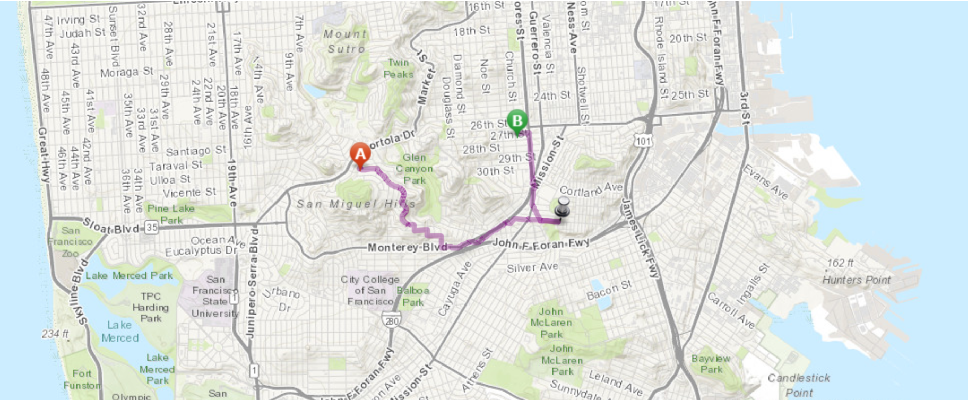

In [60]:
my_map = gis.map('Diamond Heights, San Fransisco, CA', zoomlevel=13)
my_map

Print the first "feature" of the `result['routes']['features']` in order to clear out what attributes are contained in the returned response.

In [27]:
 result['routes']['features'][0]['attributes']

{'ObjectID': 1,
 'Name': 'Location 1 - Location 3',
 'FirstStopID': 1,
 'LastStopID': 3,
 'StopCount': 3,
 'Total_TravelTime': 11.366381884763133,
 'StartTime': 1568826000000,
 'EndTime': 1568826681983,
 'StartTimeUTC': 1568826000000,
 'EndTimeUTC': 1568826681983,
 'Shape_Length': 0.06233490049317274}

Also, because the 'ArriveCurbApproach' and 'DepartCurbApproach' of a stop feature (as defined in `result['stops']['features'][stop_id]`) denote whether the stop is the starting point, the by-passing point, or the ending point, we are checking the tuples for each stop in order to decide their symbology.

If `ArriveCurbApproach` equals to None, this stop serves as a starting point; if `DepartCurbApproach` equals to None, then it serves as an ending point; else, the stop is a by-passing stop.

In [50]:
 def check_curb_approach(result, stop_id=None):
        if stop_id is not None:
            attributes = result['stops']['features'][stop_id]['attributes']
        else:
            attributes = result['attributes']
        return (attributes['ArriveCurbApproach'], attributes['DepartCurbApproach'])

In [51]:
print(check_curb_approach(result, 0))
print(check_curb_approach(result, 1))
print(check_curb_approach(result, 2))

(None, 2)
(1, 2)
(2, None)


Based on the output from the last cell, stops[0] is the starting point, stops[1] is the by-passing point, and stops[2] is the ending point. Now we have understood the information contained in the response, let's go on to make tables and maps visualizing the routing results.

In [28]:
stop_count = result['routes']['features'][0]['attributes']['StopCount']
travel_time = result['routes']['features'][0]['attributes']['Total_TravelTime']
# distance = result['routes']['features'][0]['attributes']['Total_Kilometers']

data = [('Number of stops', stop_count),
        ('Total travel time', '{0:.2f} min'.format(travel_time))]

df = pd.DataFrame.from_records(data)
df.head()

,0,1
0,Number of stops,3
1,Total travel time,11.37 min


For visualization purposes, the route is drawn as a soild purple line, the stops are represented by a silver pin, and starting and ending points are shown as red and green markers with alphabets A and B. The styles and symbologies are defined as below:

In [53]:
styles = [    
    dict(selector="td", props=[("padding", "2px")]),
    dict(selector='.row_heading, .blank', props=[('display', 'none;')]),
    dict(selector='.col_heading, .blank', props=[('display', 'none;')])]

route_symbol = {
                    "type": "esriSLS",
                    "style": "esriSLSSolid",
                    "color": [128,0,128,90],
                    "width": 4
                }

stops_symbol = {"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                "url":"http://static.arcgis.com/images/Symbols/Basic/ShinyPin.png",
                "contentType":"image/png","width":24,"height":24}

start_symbol = {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS",
                "url":"http://static.arcgis.com/images/Symbols/AtoZ/redA.png",
                "contentType":"image/png","width":15.75,"height":21.75}

end_symbol = {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS",
              "url":"http://static.arcgis.com/images/Symbols/AtoZ/greenB.png",
              "contentType":"image/png","width":15.75,"height":21.75}

popup_route = {"title": "Route", 
               "content": df.style.set_table_styles(styles).render()}
popup_stop = {"title": "Stop {}", 
              "content": df.style.set_table_styles(styles).render()}

In [ ]:
my_map.clear_graphics()

Then, we can go on to draw the route and stops with the desired styles and symbologies.

In [55]:
my_map.draw(result['routes']['features'][0]['geometry'], popup_route, route_symbol)

In [56]:
for stop in result['stops']['features']:
    
    stop_bool_tuple = check_curb_approach(stop)
    if stop_bool_tuple[0] is None:
        # starting point
        symbol = start_symbol
    elif stop_bool_tuple[1] is None:
        # ending point
        symbol = end_symbol
    else:
        # by-passing point
        symbol = stops_symbol
        
    address = geocoding.reverse_geocode(stop['geometry'])['address']['Match_addr']
    
    my_map.draw(stop['geometry'], 
                {"title": "Stop {}".format(stop['attributes']['Sequence']), 
                 "content": address},
               symbol)

### What's next?

Steps of publishing your own Network Analysis Layer, creating a RouteLayer with this NA Layer, performing routing operations with the RouteLayer's solver, and then tabularizing and mapping the solver's results, have formed a complete workflow of applying customized route service in network analysis. Similarly, we can follow the approach and solve problems for ServiceAreaLayer as to find the service areas, and ClosestFacilityLayer in order to choose the closest facilities near the incidents.

Multiple methods are available for fulfilling the requirements for routing, generating service areas, finding closest facilities, etc., and part 1 here has only mentioned the first category - using Network analysis layers - in the rest of the guide, we can get to other two types of methods which take advantage of the arcgis.network.analysis and arcgis.features.use_proximity modules.

| Operation       | NA Layer                                    | network.analysis       | features.use_proximity |
|-----------------|---------------------------------------------|------------------------|------------------------|
| Route           | **RouteLayer.solve**                        | find_routes            | plan_routes            |
| ServiceArea     | ServiceAreaLayer.solve_service_area         | generate_service_areas | create_drive_time_areas|
| ClosestFacility | ClosestFacilityLayer.solve_closest_facility | find_closest_facilities| find_nearest |

## Conclusions

Part 1 has introduced network dataset, network analysis layer, and how to create RouteServiceLayer etc. in need to solve a network analysis problem. Next, let's move onto <a href="guide_to_network_analysis_part2.ipynb">Part 2</a> which demonstrates how to find the quickest, shortest, or even the most scenic route, depending on the impedance you choose to solve for.

## References

[1] https://pro.arcgis.com/en/pro-app/help/analysis/networks/what-is-network-analyst-.htm

[2] Deelesh Mandloi, "Network Analysis Services in ArcGIS Enterprise", http://proceedings.esri.com/library/userconf/proc17/tech-workshops/tw_419-218.pdf, last accessed on 09/09/2019

[3] https://pro.arcgis.com/en/pro-app/help/analysis/networks/what-is-network-dataset-.htm

[4] https://pro.arcgis.com/en/pro-app/help/analysis/networks/network-elements.htm

[5] https://pro.arcgis.com/en/pro-app/help/analysis/networks/new-network-analysis-layer.htm